# References

## ThinkDSP

- http://greenteapress.com/thinkdsp.html
- http://greenteapress.com/thinkdsp/html/index.html
- https://github.com/AllenDowney/ThinkDSP

## ipywidgets
- https://ipywidgets.readthedocs.io/en/stable/
- https://ipython-books.github.io/


In [1]:
# Get thinkdsp.py and thinkplot.py
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py

# Matplotlib
try:
    import matplotlib
    print('Matplotlib installed')
except ImportError:
    !pip install matplotlib

# Scipy
try:
    import scipy
    print('Scipy installed')
except ImportError:
    !pip install scipy
    
# Pandas
try:
    import pandas
    print('pandas installed')
except ImportError:
    !pip install pandas

--2020-03-30 22:40:52--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)...18.228.67.229
Connecting to github.com (github.com)|18.228.67.229|:443...connected.
HTTP request sent, awaiting response...302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2020-03-30 22:40:53--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)...151.101.92.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 47674 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  46.56K  --.-KB/s    in 0.05s   

2020-03-30 22:40:54 (946 KB/s) - ‘thinkdsp.py’ saved [47674/47674]

--2020-03-30 22:40:54--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py
Re

In [2]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

# Senoidal (onda senóide)

- sinal analógico mais simples

## Parâmetros

- amplitude (amplitude peak)
- frequência (frequency)
- fase (phase)

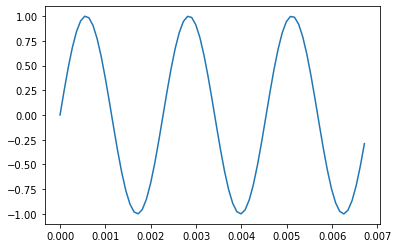

In [11]:
s = thinkdsp.Sinusoid()
# s.period
s.plot()

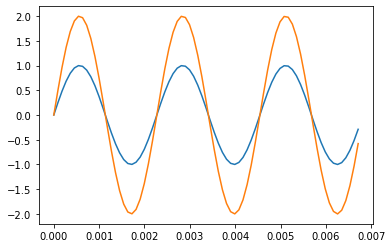

In [13]:
# Signal with amplitude = 1
amp1 = 1
s1 = thinkdsp.Sinusoid(amp=amp1)
s1.plot()

# Signal with amplitude = 2
amp2 = 2
s2 = thinkdsp.Sinusoid(amp=amp2)
s2.plot()

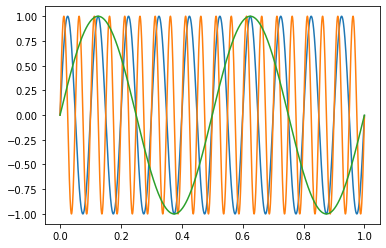

In [16]:
# Signal with frequency = 10 or period = 0.1 (1/10)
freq1 = 10
s1 = thinkdsp.Sinusoid(freq=freq1)
w1 = s1.make_wave()
w1.plot()

# # Signal with frequency = 20 or period = 0.05 (1/20)
freq2 = 20
s2 = thinkdsp.Sinusoid(freq=freq2)
w2 = s2.make_wave()
w2.plot()

freq3 = 2
s3 = thinkdsp.Sinusoid(freq=freq3)
w3 = s3.make_wave()
w3.plot()


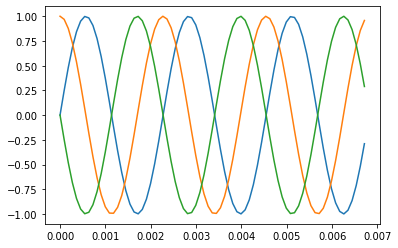

In [17]:
from math import radians

# Signal with phase = 0 degrees
phase1 = radians(0)
s1 = thinkdsp.Sinusoid(offset=phase1)
s1.plot()

# Signal with phase = 90 degrees
phase2 = radians(90)
s2 = thinkdsp.Sinusoid(offset=phase2)
s2.plot()

# Signal with phase = 180 degrees
phase3 = radians(180)
s3 = thinkdsp.Sinusoid(offset=phase3)
s3.plot()



# Wavelength (comprimento de onda)

- relaciona a frequência da onda com a velocidade de propagação do meio
- unidade: distância (cm, mm, nm)
- quanto maior frequência, maior o comprimento de onda

**Wavelength = propagation_speed * period = propagation_speed / frequency**

$ \lambda = \frac{c}{f}$

- Exemplos de velocidade de propagação
    - Velocidade da luz - aprox 3,00 x 10^8m/s
    - CAT5 UTP - aprox 2,00 x 10^8m/s


In [47]:
c = 2*10**8 # CAT5 UTP twisted pair (m/s)
f = 100*1000*1000 # 100MHz
w = c/f
w # 2 meters

2.0

In [49]:
c = 3*10**8 # speed of light
f = 2.4*1000*1000*1000 # 2.4GHz Wifi
w = c/f
w # 0.125 meters or 12.5 cm

0.125

# Sinal digital como um sinal analógico composto

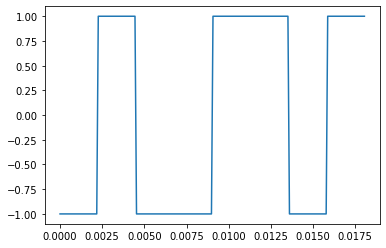

In [2]:
s = thinkdsp.SquareSignal(freq=220)
w = s.make_wave(duration=s.period)
zero = w.segment(start=0,duration=s.period/2)
one = w.segment(start=s.period/2,duration=s.period/2)
one.shift(-s.period/2)

# msg = [0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1]
msg = [0,1,0,0,1,1,0,1]
len(msg)
finalwave = None
for i in range(len(msg)):
    tw = None
    if msg[i] == 0 :
        tw = zero.copy()
    else :
        tw = one.copy()
    tw.shift(i*s.period/2)
    if finalwave == None :
        finalwave = tw
    else :
        finalwave = finalwave + tw
finalwave.plot()

In [3]:
def modify_wave_freq(wave, freq):

    thinkplot.preplot(2, cols=2)
    
    spectrum = wave.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(freq)
    spectrum.plot(color='#045a8d')
    
    newwave = spectrum.make_wave()
    
    thinkplot.subplot(2)
    wave.plot(color='0.7')
    newwave.plot(color='#045a8d')

    plt.show()

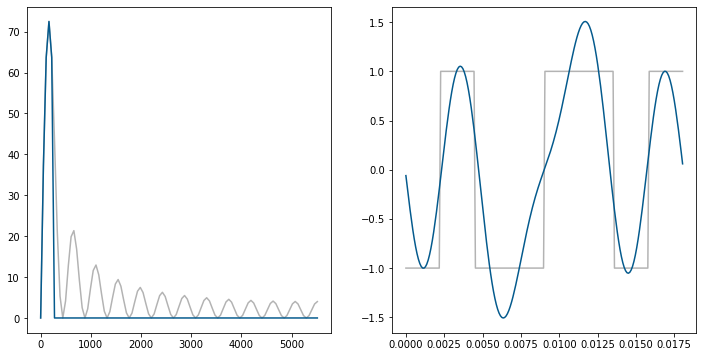

In [23]:
# interact(modify_wave_freq, wave=fixed(finalwave), freq=widgets.IntSlider(min=0, max=6000, step=10, value=5000));

modify_wave_freq(finalwave, freq=250)

# Capacidade de canal

## Nyquist - canal sem ruído

Capacidade = 2 x W x log_2(L)

## Shannon - canal com ruído

Capacidade = W x log_2(1+SNR)

In [26]:
import math

# Nyquist - sem ruído
W = 100000
L = 8
C = 2 * W * math.log2(L)
C

600000.0

In [28]:
import math

# Shannon - com ruído
W = 4000
SNR = 127
C = W * math.log2(1+SNR)
C

28000.0

In [38]:
W = 8000
SNR = 63
# L ?

# Shannon
C = W * math.log2(1+SNR)
C
# Nyquist
#C = 2 * W * math.log2(L)
#math.log2(L) = C / (2*W)
tmp = C / (2*W)

L = 2**tmp
L


8.0

In [34]:
2*W

16000